# `pegaplot` : A custom plotting API for myself
--------------

## **5줄 요약**
* **Paper-level Plot Generation with 1 Line, 3 Paramameters**
* `matplotlib`과 `seaborn`기반 custom plotting API.  
* 한글 출력, custom labeling, 주요 데이터 추출 및 삽입 가능.  
* bar, pie, donut, (`DataFrame`간 비교 포함) distribution, scatter plot 가능.
* 자유도를 희생하고 효율성을 취함: 그래프를 **찍어내기**위한 API입니다.
--------------------

### Table of Contents ###
[0. 개발 동기]()  
[1. 설치 방법]()  
[2. 사용 방법]()  
[- 2.1. import pegaplot as pp]()  
[- 2.2. 예제 데이터 읽기]()  
[- 2.3. df2md()]()  
[- 2.4. bar()]()  
[--- 2.4.1. bar(DataFrame, column): 기본 사용법]()  
[--- 2.4.2. xcols: 복수 column 분석]()  
[--- 2.4.3. rols: 제약변수]()  
[--- 2.4.4. labels: Custom Labels]()  
[--- 2.4.5. gap: Data value 출력]()  
  

## 0. 개발 동기
1. 동일 데이터로 장시간 반복작업을 하다 보니 그래프의 통일성이 훼손됩니다.
  * 학회 발표, 논문 작성시마다 재작업이 필요했습니다.    
2. `matplotlib` 용법을 찾기 위한 구글링을 포함해 유사 반복 작업이 많습니다.  
  * 업무 효율성이 떨어지고 있었습니다.  
3. 최대한 군더더기를 제외하고 필요한 기능만 남긴 함수로 만들어 사용했습니다.  
  * 유사한 코드가 많아지다 보니 백업, 버전관리가 절실했습니다.  
4. `github`을 통해 타인으로부터 받은 피드백이 유용한 경험이 있습니다.  
  * 이를 재현하고자 합니다.  

## 1. 설치 방법
1. 본인이 관리하기 편한 곳에 디렉토리를 만듭니다.  
2. 새로 만든 디렉토리에 `pegaplot.py`를 [다운로드](https://github.com/jehyunlee/code-snippet/blob/master/0_work-snippet/pegaplot/pegaplot.py) 받습니다.
3. 운영체제에 따라 아래와 같은 방법으로 `python import` 환경을 설정합니다.  

### 1.1. Windows
1. `환경 변수 설정`에서 `PYTHONPATH`를 [링크](https://sshkim.tistory.com/158)를 참고하여 설정합니다.
2. `명령 프롬프트`에서 `set`을 입력하여 설정을 활성화합니다.

### 1.2. Linux
* `.bashrc`에 `PYTHONPATH`를 [링크](https://stackoverflow.com/questions/3402168/permanently-add-a-directory-to-pythonpath)와 같이 설정해 줍니다.  
* `source .bashrc`로 설정을 활성화합니다.  

## 2. 사용 방법

### 2.1. `import pegaplot`으로 불러옵니다.
* 그래프에 한글 표현이 가능해집니다. Font는 나눔고딕입니다.  
* `seaborn`기반으로 기본 환경이 설정됩니다: `whitegrid`, `muted`, `talk`
* 작업하시는 위치에 `images` 폴더가 있는지 확인하고 없으면 만들어줍니다. 그림들이 저장될 곳입니다.  
* 추가 작업을 안하신다면 `matplotlib`이나 `seaborn`을 따로 부를 필요가 없습니다.

버전:  3.1.1
설치 위치:  /opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정 파일 위치:  /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic
# matplotlib 한글 사용 가능
# Seaborn Figure Style : whitegrid, muted, talk
# Available Functions : df2md(), bar(), pie(), donut(), dist(), dists(), scatter()


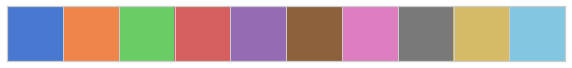

In [1]:
import pegaplot as pp

### 2.2. 그림을 그릴 데이터 파일을 불러옵니다.

#### 2.2.1. Categorical Data: Kaggle Titanic dataset
* `kaggle`의 `titanic` `test set` 데이터를 이용하겠습니다. ([다운로드](https://github.com/jehyunlee/code-snippet/blob/master/0_work-snippet/data_sample/titanic_train.csv))
* 편의상 작업 디렉토리에 `data`를 만들고 거기에 복사해 두었습니다.
* 데이터를 불러오기 위해 `pandas`를 `import`합니다.

In [2]:
import pandas as pd

datafile = './data/titanic_train.csv'
dft = pd.read_csv(datafile)

#### 2.2.2. Numerical Data: Scikit-learn Boston House Price
* `scikit-learn`의 `boston house price` 데이터를 이용하겠습니다. 
* 데이터를 불러오기 위해 `scikit-learn`을 `import`합니다.

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfb = pd.concat([dfX, dfy], axis=1)

### 2.3. `df2md()` : `DataFrame`을 `Markdown`으로 변환해서 출력

* `DataFrame`을 깔끔하게 출력하기 위해 `pegaplot`의 `df2md`를 `import`합니다.  
  `import pegaplot as pp`에서 `pp.df2md()`로 사용 가능하지만,  
  자주 쓰는 명령인 만큼 일일이 앞에 `pp.`를 붙이는 번거로움을 없애기 위해서입니다.
* `DataFrame`을 `Markdown`으로 출력해주는 명령입니다.  
* 웹 환경에서의 가독성을 향상시키는 효과가 있습니다.

In [4]:
from pegaplot import df2md
df2md(dft.head())

(index)|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked
---|---|---|---|---|---|---|---|---|---|---|---|---
0|1|0|3|Braund, Mr. Owen Har ...|male|22.0|1|0|A/5 21171|7.25|nan|S
1|2|1|1|Cumings, Mrs. John B ...|female|38.0|1|0|PC 17599|71.2833|C85|C
2|3|1|3|Heikkinen, Miss. Lai ...|female|26.0|0|0|STON/O2. 3101282|7.925|nan|S
3|4|1|1|Futrelle, Mrs. Jacqu ...|female|35.0|1|0|113803|53.1|C123|S
4|5|0|3|Allen, Mr. William H ...|male|35.0|0|0|373450|8.05|nan|S


* `Name`과 `Ticket`의 내용을 짧게 출력하고 싶습니다.
* `df2md()`의 `maxlen` 옵션을 이용해봅시다. 내용이 긴 cell을 짧게 줄여주는 옵션입니다.

In [5]:
df2md(dft.head(), maxlen=3)

(index)|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked
---|---|---|---|---|---|---|---|---|---|---|---|---
0|1|0|3|Bra ...|mal ...|22. ...|1|0|A/5 ...|7.2 ...|nan|S
1|2|1|1|Cum ...|fem ...|38. ...|1|0|PC  ...|71. ...|C85|C
2|3|1|3|Hei ...|fem ...|26. ...|0|0|STO ...|7.9 ...|nan|S
3|4|1|1|Fut ...|fem ...|35. ...|1|0|113 ...|53. ...|C12 ...|S
4|5|0|3|All ...|mal ...|35. ...|0|0|373 ...|8.0 ...|nan|S


* `index`를 기본적으로 **(index)** 로 보여주는데, **[idx]**로 바꿔봅시다.

In [6]:
df2md(dft.head(), maxlen=3, indexname='[idx]')

[idx]|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked
---|---|---|---|---|---|---|---|---|---|---|---|---
0|1|0|3|Bra ...|mal ...|22. ...|1|0|A/5 ...|7.2 ...|nan|S
1|2|1|1|Cum ...|fem ...|38. ...|1|0|PC  ...|71. ...|C85|C
2|3|1|3|Hei ...|fem ...|26. ...|0|0|STO ...|7.9 ...|nan|S
3|4|1|1|Fut ...|fem ...|35. ...|1|0|113 ...|53. ...|C12 ...|S
4|5|0|3|All ...|mal ...|35. ...|0|0|373 ...|8.0 ...|nan|S


### 2.4. `bar()` : Categorical Data 개수 비교

#### 2.4.1. bar(DataFrame, column): 기본 사용법
* `seaborn`의 `barplot`을 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

* 생존자와 사망자 수를 세어보도록 하겠습니다.
* 파일명은 `cat_bar_{DataFrame}_{column}.png`이므로, `cat_bar_dft_Survived.png`입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'Survived')
df_name = namestr(-3, df)


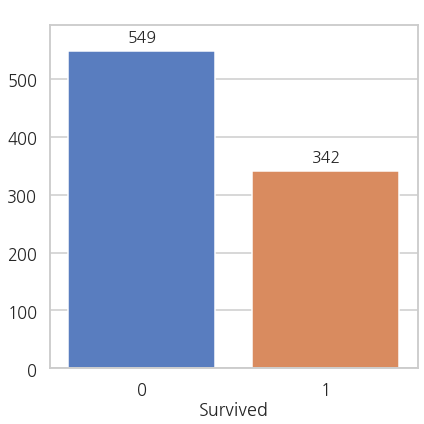

In [7]:
pp.bar(dft, 'Survived')

#### 2.4.2. xcols: 복수 column 분석
* `pegaplot`은 그래프를 여러 장 찍어내기 위한 API입니다.  
  `column` 자리에 `list`를 넣어도 동작합니다. 
* 이 때 그림들은 각각의 파일로 저장됩니다.  

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, ['Survived', 'Pclass', 'SibSp'])
df_name = namestr(-3, df)


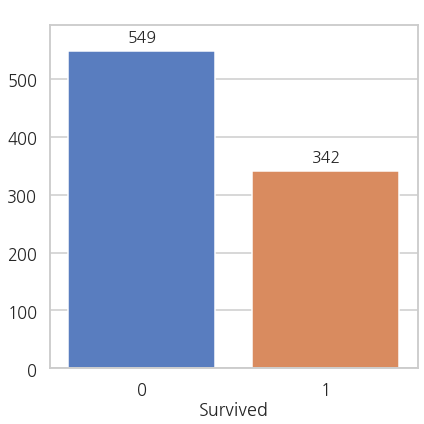

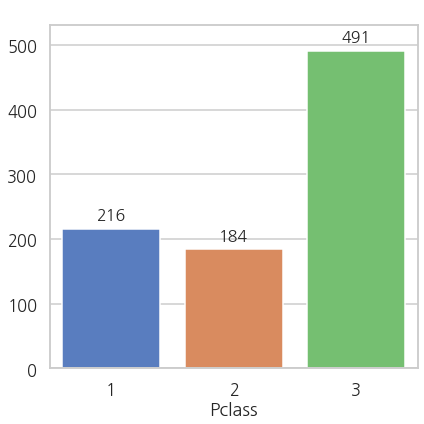

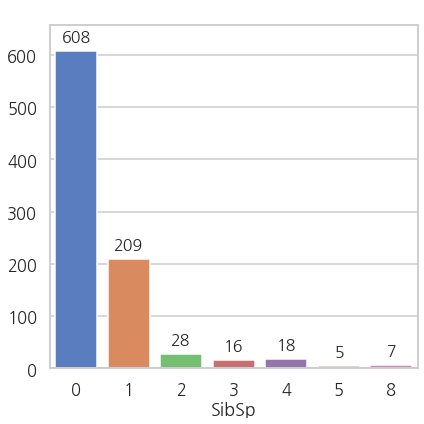

In [8]:
pp.bar(dft, ['Survived', 'Pclass', 'SibSp'])

#### 2.4.3. rcols: 제약변수
* 이번에는 `Pclass`별 `Survivor`를 구해보겠습니다.
* 제약변수(`restrictor`)를 추가하면 됩니다.
* 제약변수도 `list`형태로 입력할 수 있습니다.
* 파일명은 `cat_bar_{DataFrame}_{column}_{restrictor}{value}.png`입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'Survived', ['Pclass', 'Sex'])
df_name = namestr(-3, df)


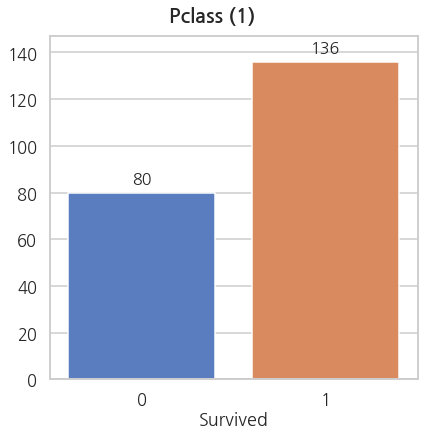

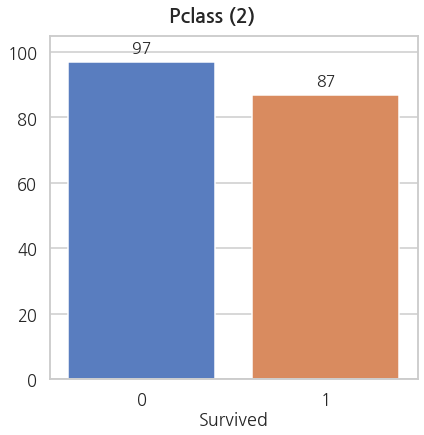

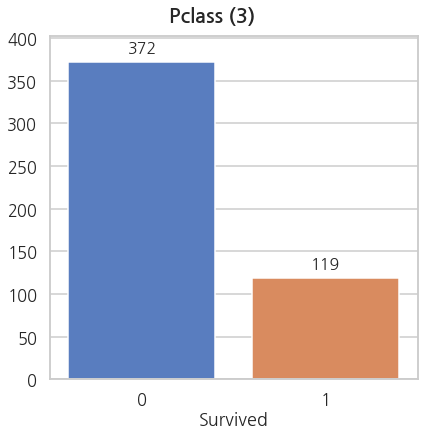

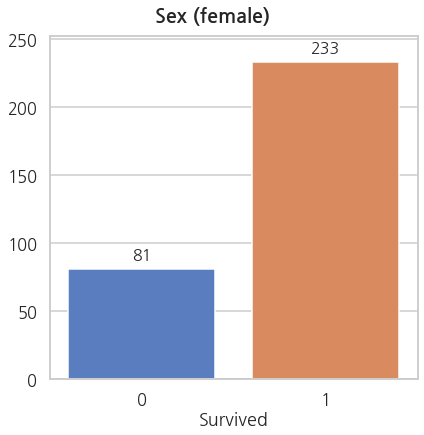

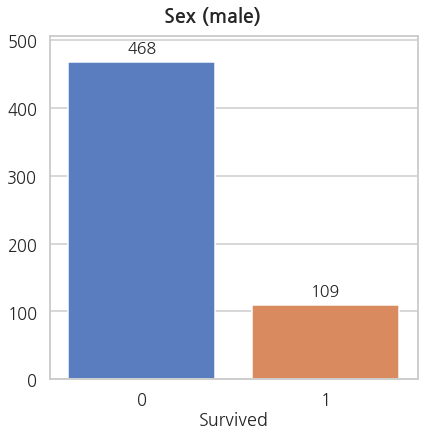

In [9]:
pp.bar(dft, 'Survived', ['Pclass', 'Sex'])

#### 2.4.4. labels: Custom Labels
* `labels` 옵션을 이용해서 변수명 대신 이름을 출력할 수 있습니다.
* `dict` type으로, `{변수명:레이블}` 구조를 받습니다.

In [10]:
dft.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
cols = dft.columns
labels_kr = ['승객ID', '생존여부', '객실등급', '이름', '성별', '나이', \
             '형제배우자 수', '부모자식 수', '티켓 번호', '요금', \
             '객실 번호', '출발지']
labelt = dict(zip(cols, labels_kr))
print(labelt)

{'PassengerId': '승객ID', 'Survived': '생존여부', 'Pclass': '객실등급', 'Name': '이름', 'Sex': '성별', 'Age': '나이', 'SibSp': '형제배우자 수', 'Parch': '부모자식 수', 'Ticket': '티켓 번호', 'Fare': '요금', 'Cabin': '객실 번호', 'Embarked': '출발지'}


return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'Survived', 'Pclass', labels=labelt)
df_name = namestr(-3, df)


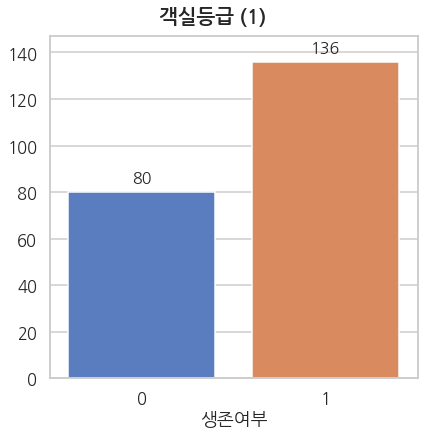

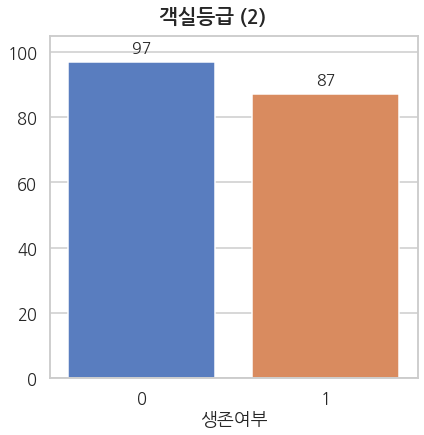

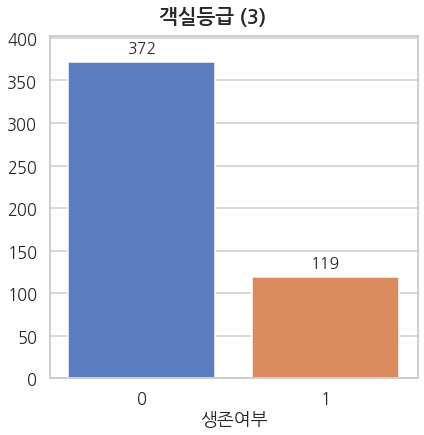

In [12]:
pp.bar(dft, 'Survived', 'Pclass', labels=labelt)

#### 2.4.5. gap: Data value 출력
* bar graph 상단의 숫자 위치를 조정할 수 있습니다.
* data의 위치는 가장 큰 데이터의 높이를 기준으로 상대적으로 결정됩니다.
* 기본값은 3 % (gap = 0.03)이며, 음수와 제거(gap=`None`)도 가능합니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'SibSp', gap=0.02, labels=labelt)
df_name = namestr(-3, df)


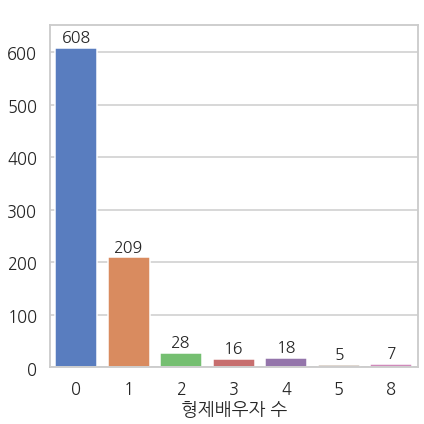

In [13]:
pp.bar(dft, 'SibSp', gap=0.02, labels=labelt)

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'SibSp', gap=-0.1)
df_name = namestr(-3, df)


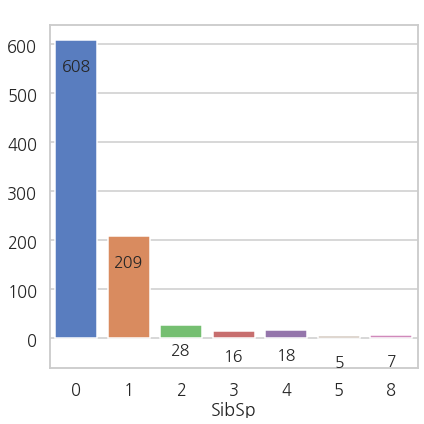

In [14]:
pp.bar(dft, 'SibSp', gap=-0.1)

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.bar(dft, 'SibSp', gap=None)
df_name = namestr(-3, df)


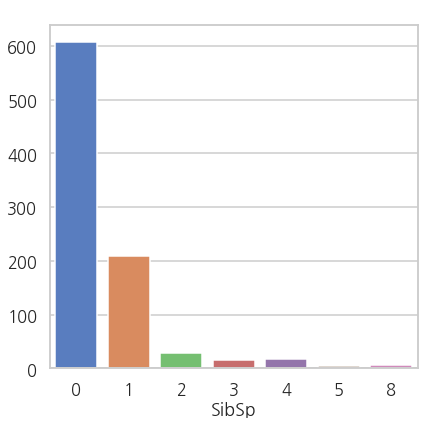

In [15]:
pp.bar(dft, 'SibSp', gap=None)

### 2.5. `pie()` : Categorical Data 개수 비교

#### 2.5.1. bar(DataFrame, column): 기본 사용법
* `matplotlib`의 `pie`를 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'Pclass')
df_name = namestr(-3, df)


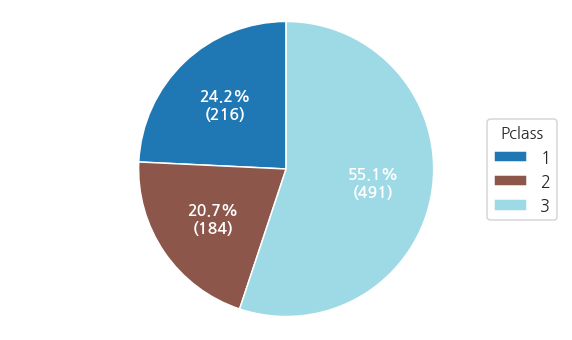

In [16]:
pp.pie(dft, 'Pclass')

#### 2.5.2. xcols, rcols: 복수 column, 복수 제약변수
* `bar()`와 마찬가지로 `xcols`와 `rcols`에 여러 개의 변수를 넣을 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, ['Survived', 'SibSp'], ['Pclass'])
df_name = namestr(-3, df)


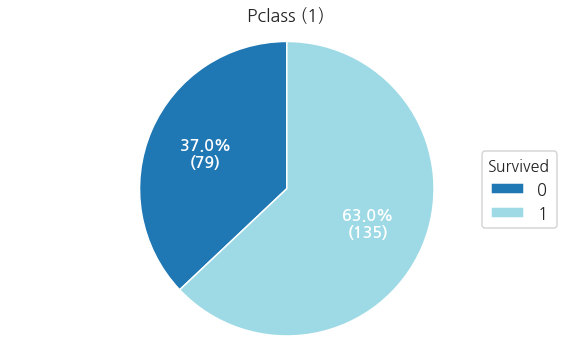

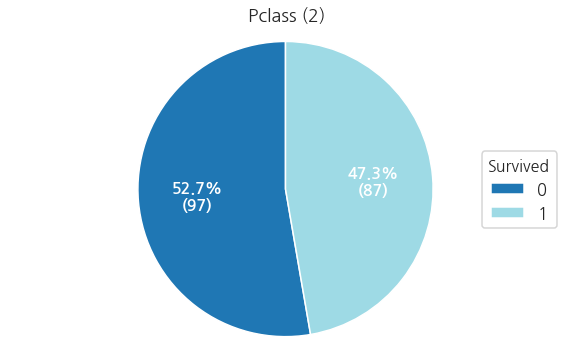

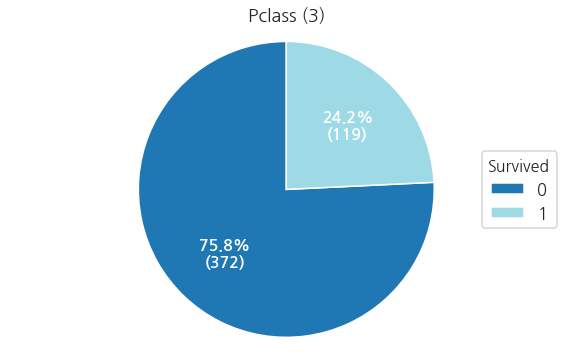

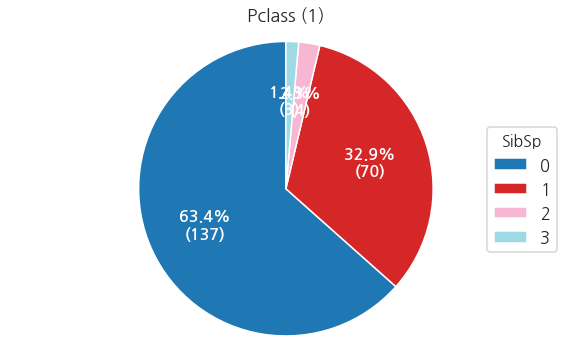

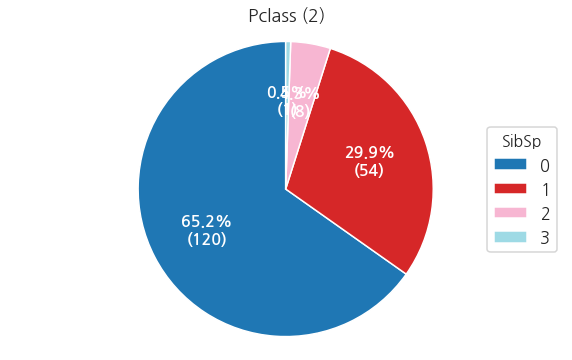

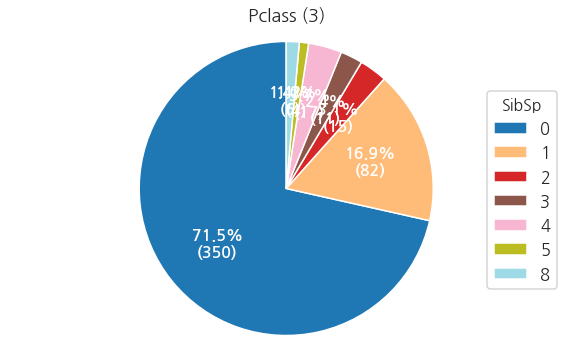

In [17]:
pp.pie(dft, ['Survived', 'SibSp'], ['Pclass'])

#### 2.5.3. labels: Custom Labels
* `bar()`와 마찬가지로 `dict` type의 custom label을 넣을 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'Pclass', 'Survived', labels=labelt)
df_name = namestr(-3, df)


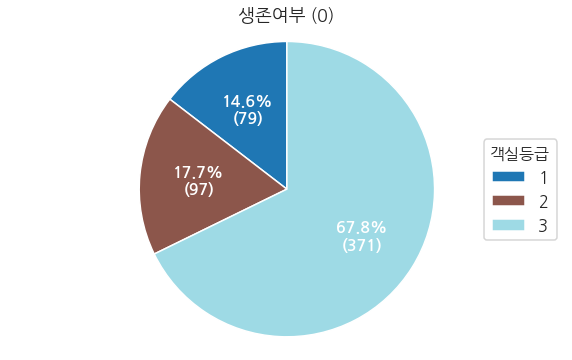

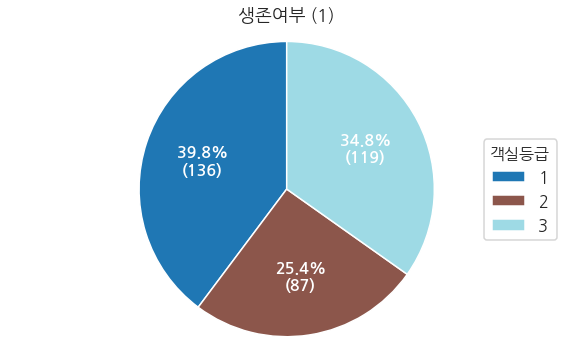

In [18]:
pp.pie(dft, 'Pclass', 'Survived', labels=labelt)

#### 2.5.4. cmap: color map
* pie chart의 배색을 변경할 수 있습니다.
* `matplotlib`의 [`colormap`](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)을 사용합니다.
* 기본값은 `'tab20'`입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'Pclass', labels=labelt, cmap='Accent')
df_name = namestr(-3, df)


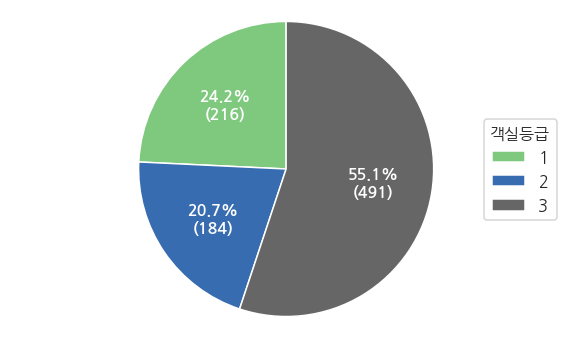

In [19]:
pp.pie(dft, 'Pclass', labels=labelt, cmap='Accent')

#### 2.5.5. startangle: pie chart 회전
* pie chart의 각도를 변경할 수 있습니다.
* `startangle`에 `degree` 단위로 각도를 넣으면 됩니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'Pclass', cmap='Set1', startangle=-45)
df_name = namestr(-3, df)


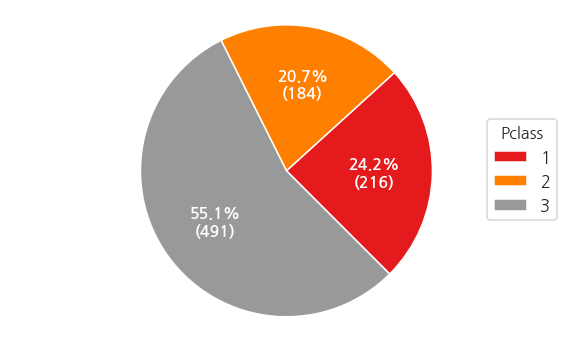

In [20]:
pp.pie(dft, 'Pclass', cmap='Set1', startangle=-45)

#### 2.5.6. annotate: Data Value On/OFF
* pie chart 위에 표기되는 숫자를 끌 수 있습니다.  
* 숫자를 끄면, 데이터가 별도의 표로 표기됩니다. 
* `labels` 옵션과 함께 사용하면 표의 변수명까지 바꾸어 보실 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'SibSp', labels=labelt, annotate=False)
df_name = namestr(-3, df)


형제배우자 수|No. of Data
---|---
0|608
1|209
2|28
3|16
4|18
5|5
8|7


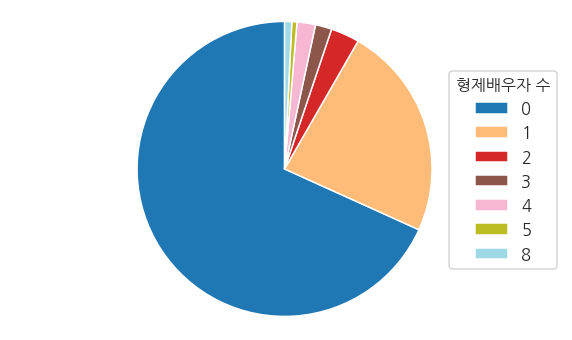

In [21]:
pp.pie(dft, 'SibSp', labels=labelt, annotate=False)

#### 2.5.7. legend: 범례 On/OFF
* pie chart 우측의 범례를 끌 수 있습니다.
* 이 때 변수 이름은 pie chart 중앙에 위치합니다.
* `legend=False` 입력시 나오는 오류메시지는 무시하셔도 좋습니다.

No handles with labels found to put in legend.


return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.pie(dft, 'Sex', 'Survived', labels=labelt, legend=False)
df_name = namestr(-3, df)


No handles with labels found to put in legend.


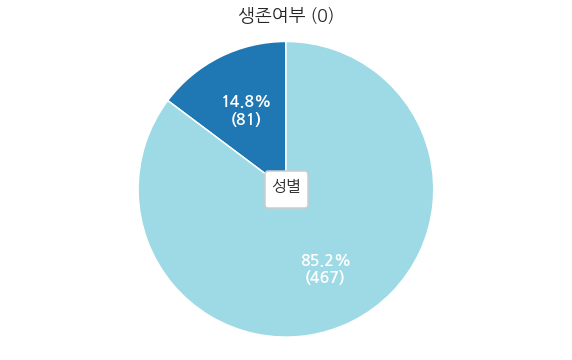

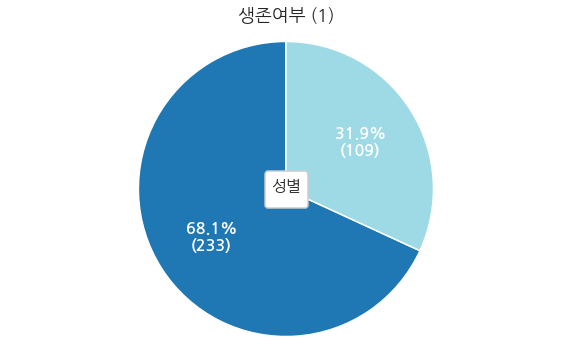

In [22]:
pp.pie(dft, 'Sex', 'Survived', labels=labelt, legend=False)

### 2.6. `donut()` : Categorical Data 개수 비교

#### 2.6.1. donut(DataFrame, column): 기본 사용법
* `pie`와 같이 `matplotlib`의 `pie`를 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, 'Pclass')
df_name = namestr(-3, df)


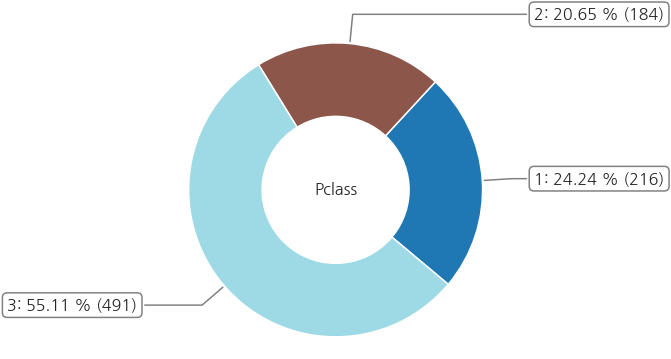

In [23]:
pp.donut(dft, 'Pclass')

#### 2.6.2. xcols, rcols: 복수 column, 복수 제약변수
* `pegaplot`은 그래프를 여러 장 찍어내기 위한 API입니다.  
* `bar()`와 마찬가지로 `xcols`와 `rcols`에 여러 개의 변수를 넣을 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, ['Survived', 'Pclass'], ['SibSp', 'Sex'])
df_name = namestr(-3, df)


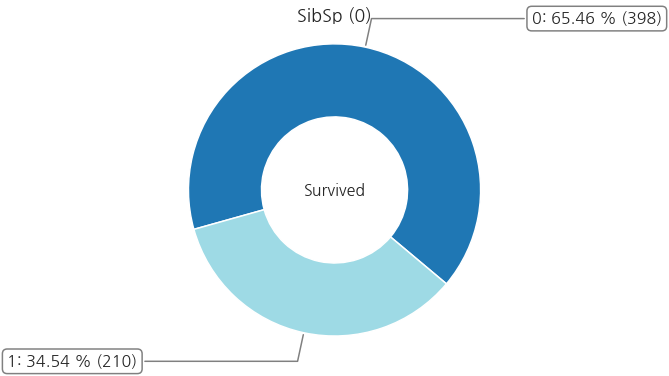

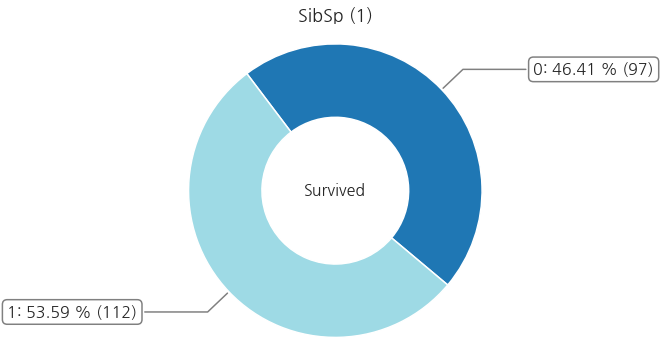

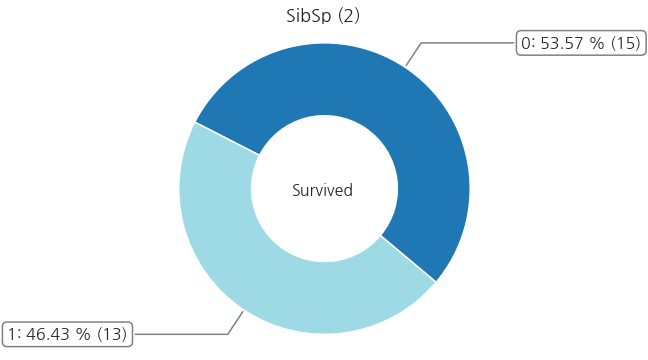

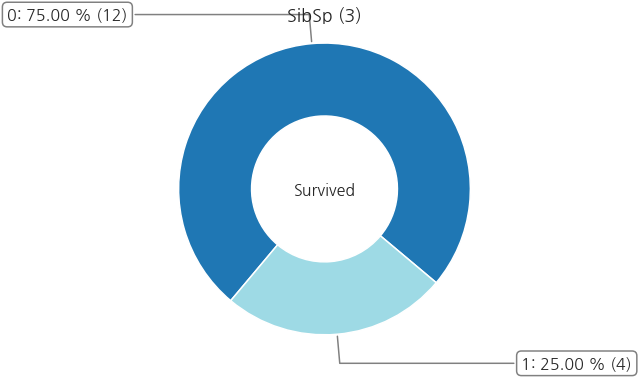

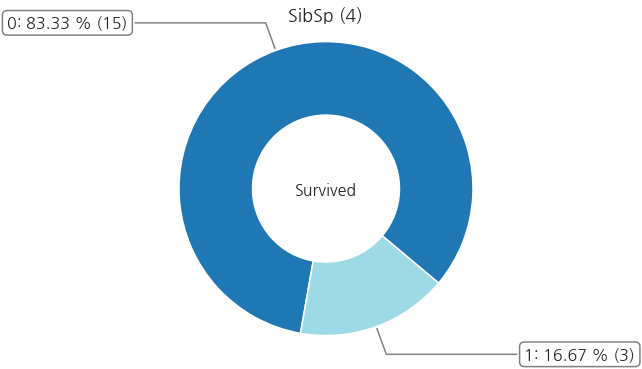

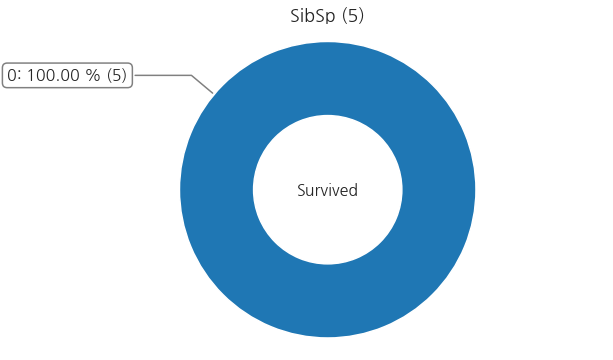

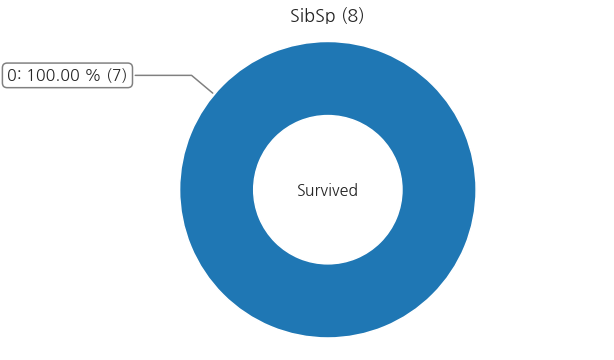

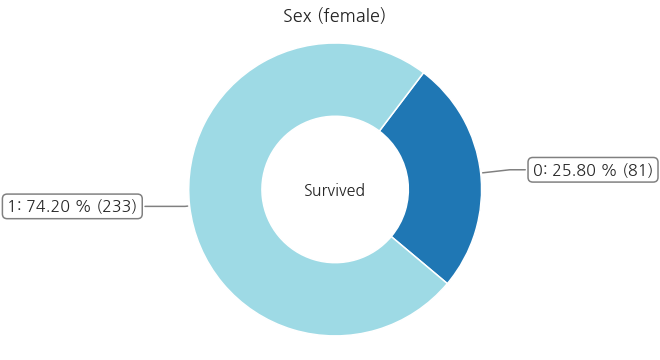

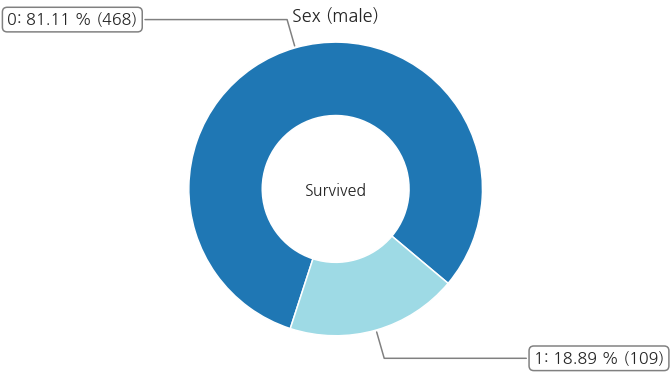

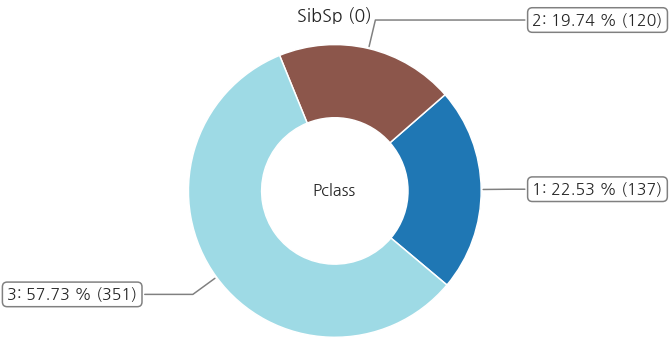

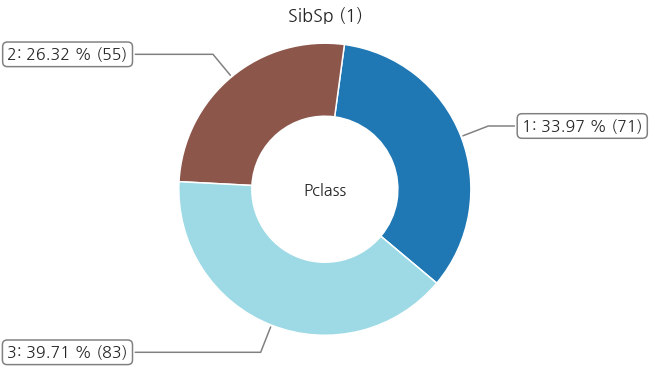

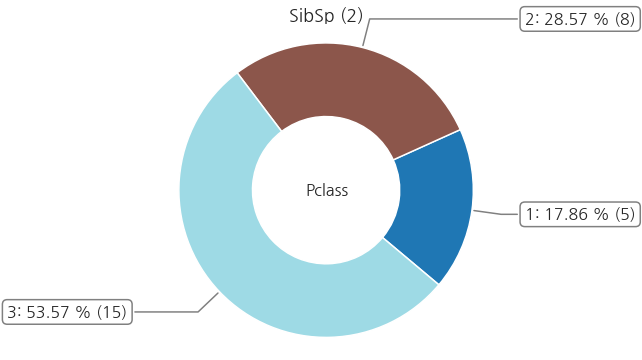

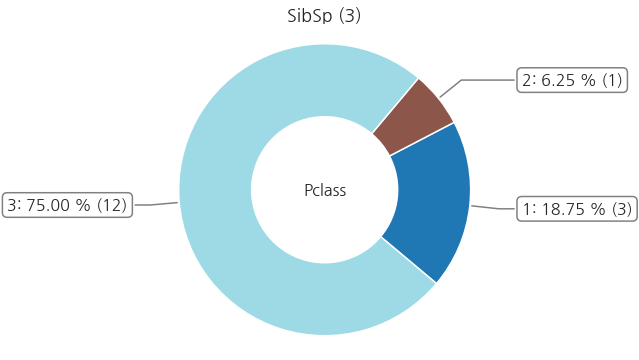

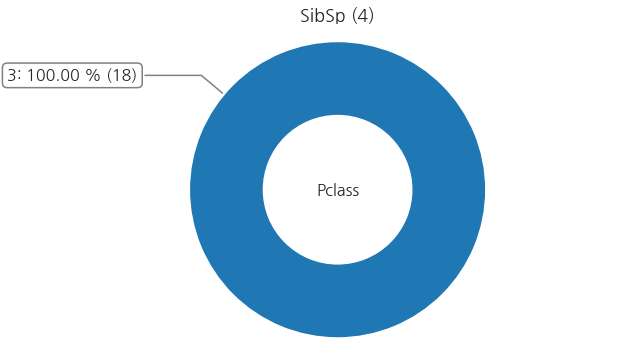

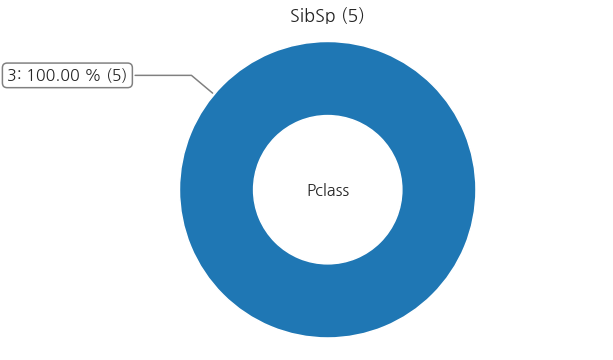

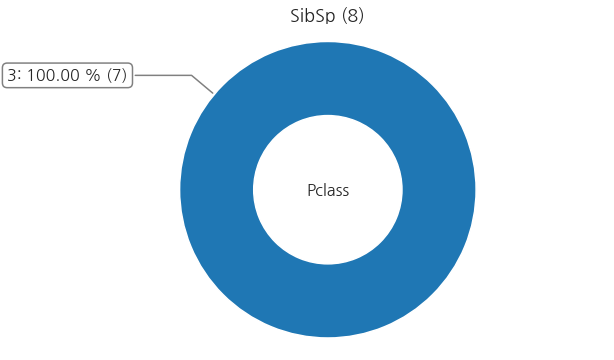

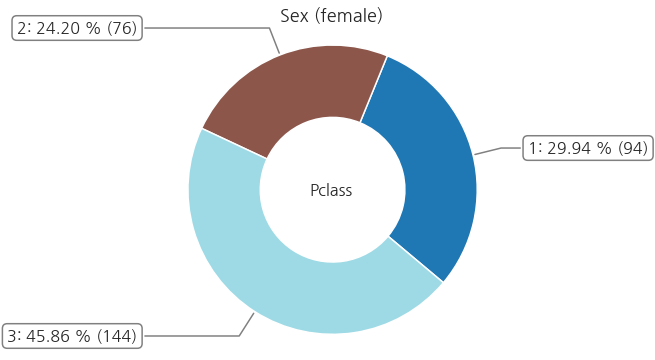

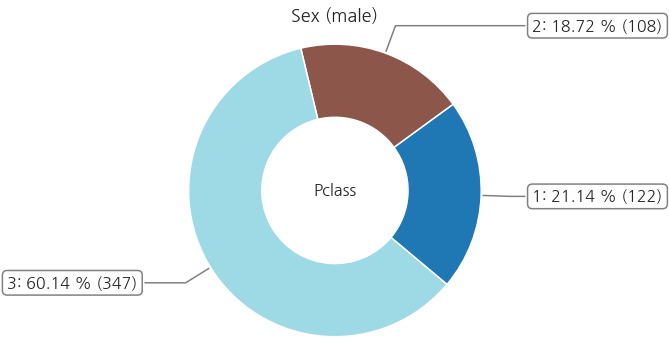

In [24]:
pp.donut(dft, ['Survived', 'Pclass'], ['SibSp', 'Sex'])

#### 2.6.3. labels: Custom Labels
* `bar()`, `pie()`와 마찬가지로 `dict` type의 custom label을 넣을 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, ['Survived', 'Pclass', 'SibSp'], labels=labelt)
df_name = namestr(-3, df)


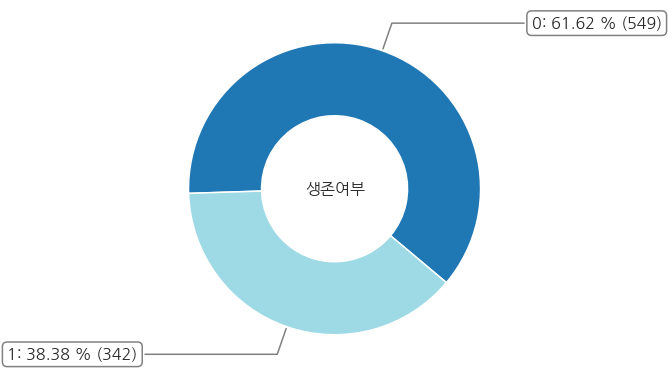

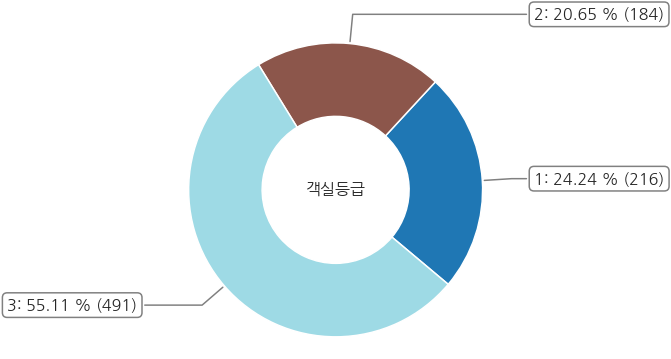

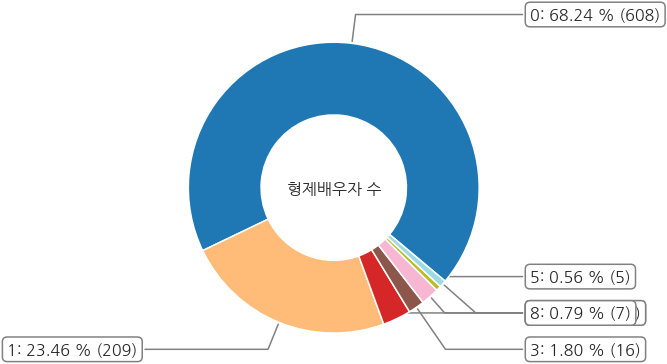

In [25]:
pp.donut(dft, ['Survived', 'Pclass', 'SibSp'], labels=labelt)

#### 2.7.4. cmap: color map
* `donut` chart의 배색을 변경할 수 있습니다.
* `matplotlib`의 `colormap`을 사용합니다.
* 기본값은 `'tab20'`입니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, 'Pclass', labels=labelt, cmap='rainbow')
df_name = namestr(-3, df)


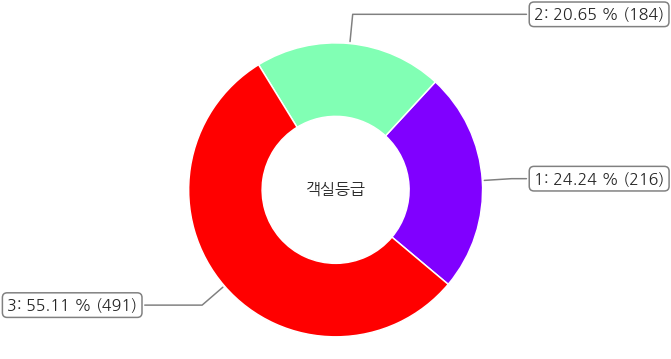

In [26]:
pp.donut(dft, 'Pclass', labels=labelt, cmap='rainbow')

#### 2.8.4. startangle: donut chart 회전
* 위 그림을 보면 `label`이 `title`을 가리고 있습니다.
* 이런 경우에 `startangle`을 조정할 수 있습니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, 'Pclass', labels=labelt, cmap='rainbow', startangle=-60)
df_name = namestr(-3, df)


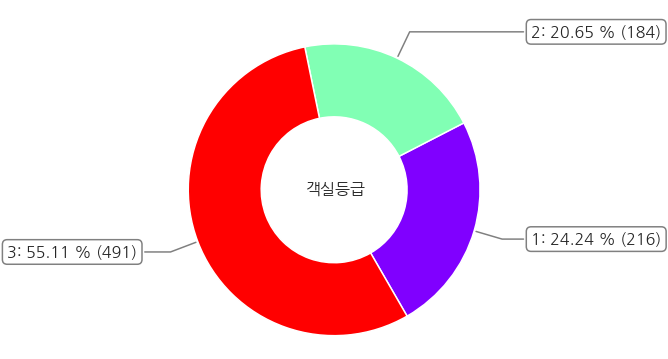

In [27]:
pp.donut(dft, 'Pclass', labels=labelt, cmap='rainbow', startangle=-60)

#### 2.8.5. annotate: 꼬리표 On/Off
* `annotation`을 원치 않는 경우 `False`로 설정하여 제거할 수 있습니다.
* 데이터 값은 별도의 표로 출력됩니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, 'Pclass', annotate=False)
df_name = namestr(-3, df)


Pclass|No. of Data
---|---
1|216
2|184
3|491


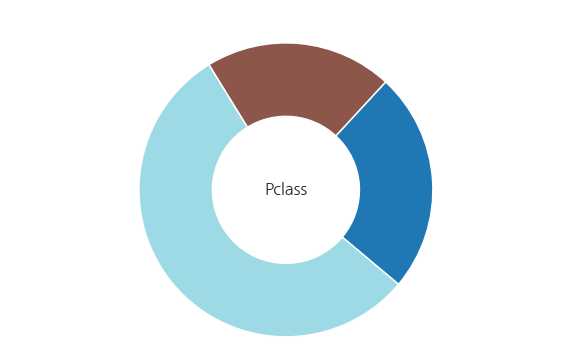

In [28]:
pp.donut(dft, 'Pclass', annotate=False)

#### 2.8.6. legend: 범례 On/Off
* `pie` chart와 같이 `legend`로 표시할 수 있습니다.
* 이 때 그림 중앙에 있던 변수 이름은 `legend`로 이동합니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.donut(dft, 'SibSp', labels=labelt, annotate=False, legend=True)
df_name = namestr(-3, df)


형제배우자 수|No. of Data
---|---
0|608
1|209
2|28
3|16
4|18
5|5
8|7


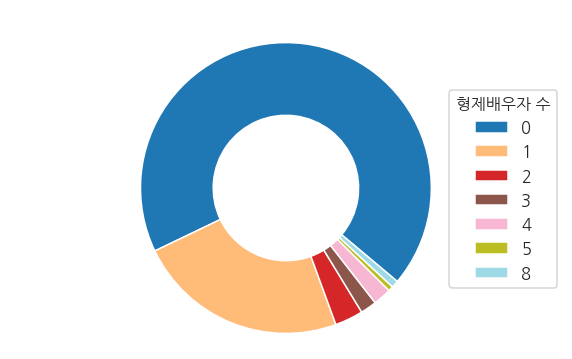

In [29]:
pp.donut(dft, 'SibSp', labels=labelt, annotate=False, legend=True)

### 2.7. `dist()` : Numerical Data Distribution

#### 2.7.1. Numerical Data Preparation
* 앞서 불러둔 보스턴 집값 데이터를 대상으로 `custom label (labelb)`을 작성하고,
* `pegaplot` 기능 시연을 위해 `numerical`데이터 일부를 `categorical`로 변경합니다.

In [30]:
df2md(dfb.head())

(index)|CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|B|LSTAT|MEDV
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1.0|296.0|15.3|396.9|4.98|24.0
1|0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2.0|242.0|17.8|396.9|9.14|21.6
2|0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2.0|242.0|17.8|392.83|4.03|34.7
3|0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3.0|222.0|18.7|394.63|2.94|33.4
4|0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3.0|222.0|18.7|396.9|5.33|36.2


In [31]:
dfb.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
cols = dfb.columns
labels_kr = ['범죄율', '25k ft2 초과\n거주지역 비율', '비상업 면적비율', '찰스강 근교 여부', \
             '일산화질소 농도', '평균 방 수', '1940년 이전\n주택 비율', '직업센터까지 거리', \
             '고속도로까지 거리', '재산세율', '학생 교사 비율', '흑인 비율', '하위 계층 비율', \
             '주택 가격 (중앙값)']
labelb = dict(zip(cols, labels_kr))
print(labelb)

{'CRIM': '범죄율', 'ZN': '25k ft2 초과\n거주지역 비율', 'INDUS': '비상업 면적비율', 'CHAS': '찰스강 근교 여부', 'NOX': '일산화질소 농도', 'RM': '평균 방 수', 'AGE': '1940년 이전\n주택 비율', 'DIS': '직업센터까지 거리', 'RAD': '고속도로까지 거리', 'TAX': '재산세율', 'PTRATIO': '학생 교사 비율', 'B': '흑인 비율', 'LSTAT': '하위 계층 비율', 'MEDV': '주택 가격 (중앙값)'}


#### 2.7.2. dist(DataFrame, columns): 기본 사용법
* `seaborn`의 `distplot`을 기본으로 동작하는 데이터 분포 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 분포를 확인할 `columns`이름 입니다.
* 그래프 외에도 평균, 표준편차, 최소, 최대값이 `text`로 출력됩니다.

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
pp.dist(dfb, 'RM')
df_name = namestr(-3, df)


KeyError: '@pega@dummy@pega@'

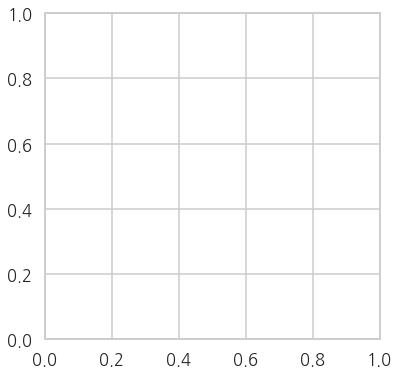

In [33]:
pp.dist(dfb, 'RM')

#### 2.7.3. xcols, rcols: 복수 column, 복수 제약변수
* 앞의 그래프들과 같이 복수의 `rcols`에 대해 복수의 `xcols`를 그릴 수 있습니다.
* `CHAS(찰스 강 근교 여부)`에 따른 `RM(평균 방 수)`를 그려봅니다.

In [ ]:
pp.dist(dfb, 'RM', 'CHAS')

* 시연을 하기에 `categorical` 변수 갯수가 부족하므로 `CHAS(찰스강 근교 여부)`에 이어 `RM(평균 방 수)`를 `categorical`로 변환합니다.
* `seaborn`기본 그래프와의 비교를 위해 `seaborn`으로 구현한 결과를 보면 사소한 변화를 감지할 수 있습니다.

In [ ]:
print(abc)

In [ ]:
import seaborn as sns

sns.distplot(dfb['CHAS'], label='x')
plt.legend()

In [ ]:
import numpy as np

def floor(x):  return np.floor(x)

dfb['RM'] = dfb['RM'].apply(floor)
sns.distplot(dfb['RM'])

* `RM(평균 방 수)`가 

In [ ]:
# test cell
import pegaplot as pp
import pandas as pd
from pegaplot import df2md

from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfb = pd.concat([dfX, dfy], axis=1)

cols = dfb.columns
labels_kr = ['범죄율', '비상업 면적비율', '일산화질소 농도', '평균 방 수', '하위 계층 비율', \
             '흑인 비율', '학생 교사 비율', '25k ft2 초과\n거주지역 비율', '찰스강 근교 여부', \
             '1940년 이전\n주택 비율', '고속도로까지 거리', '직업센터까지 거리', '재산세율', \
             '주택 가격 (중앙값)']
labelb = dict(zip(cols, labels_kr))
print(labelb)

In [ ]:
# test cell
import pegaplot as pp
import pandas as pd
from pegaplot import df2md

datafile = './data/titanic_train.csv'
dft = pd.read_csv(datafile)

pp.bar(dft, 'Survived')

In [ ]:
text = "pp.donut(   df = dft   , 'Pclass', 'Survive')"

In [ ]:
begin = text.find('(') + 1
end = text.find(',', begin)
ans = text[begin:end].strip(' ')
if '=' in ans:
  ans = ans.split('=')[1]
print(ans)

In [ ]:
import matplotlib.pyplot as plt
plt.style.context('seaborn')